# Solving Ordinary Differential Equations

<hr>
&nbsp;

## Table of content

- [1. Templates for 1st order equations](#1)
    - [1.1. Example 1](#1.1)
    - [1.2. Example 2](#1.2)
    - [1.3. Example 3](#1.3)
    - [1.4. Example 4](#1.4)
    - [1.5. Example 5](#1.5)
- [2. Templates for systems of 1st order equations](#2)
    - [2.1. Lotka-Volterra](#2.1)
    - [2.2. HIV modelisation](#2.2)
    - [2.3. Covid 19](#2.3)
    - [2.4 Lorenz attractor](#2.4)
- [3. Templates for 2nd order equations](#3)
    - [3.1. Example 1](#3.1)
    - [3.2. Example 2](#3.2)
    - [3.3. Example 3](#3.3)
    - [3.4. Example 4](#3.4)
    - [3.5. Example 5](#3.5)
- [4. Advanced manipulation](#4)
    - [4.1. Odeint](#4.1)
    - [4.2. Solve_ivp](#4.2)
    - [4.3. Multiple parameter values](#4.3)
    - [4.4 Multiple initial values](#4.4)
    - [4.5. Multiple initial values and parameter values](#4.5)


<hr>
&nbsp;

In [3]:
# before anything, import those libraries
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

<hr>
&nbsp;

## <a id='1'></a> 1. Templates for 1st order equations

### <a id='1.1'></a> 1.1. Example 1

&nbsp;

$y'(t) = -ky(t)$

In [4]:
# time array
t0 = 0
tf = 10
step = 0.1
t = np.arange(t0, tf, step)

In [5]:
# initial value
y0 = [5]

&nbsp;

#### <a id='1.1.1'></a> 1.1.1. Using odeint

In [6]:
# solve ODE using odeint
def eq_diff1(y, t):
    k = 0.3
    dydt = -k * y
    return dydt

y = odeint(eq_diff1, y0, t)

In [7]:
# check the size of solution
y.shape

(100, 1)

&nbsp;

#### <a id='1.1.2'></a> 1.1.2. Using solve_ivp

In [8]:
# solve ODE using solve_iv
def eq_diff1_bis(t, y):  # reverse parameters
    k = 0.3
    dydt = -k * y
    return dydt

y_bis = solve_ivp(eq_diff1_bis, [t0, tf], y0, t_eval=t).y  # reverse order parameters

In [10]:
# check the size of solution
y_bis.shape

(1, 100)

In [11]:
# dimensions with solve_ivp are the reversed than with odeint
y_bis = y_bis.T
y_bis.shape

(100, 1)

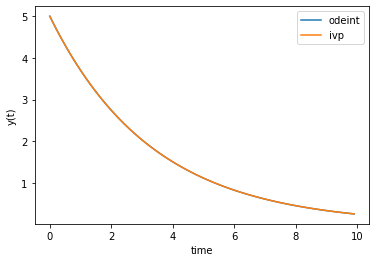

In [12]:
plt.plot(t, y, label='odeint')
plt.plot(t, y_bis, label='ivp')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend(loc='best')
plt.show()

&nbsp;

### <a id='1.2'></a> 1.2. Example 2

&nbsp;

$y'(t) = -y(t) + 1$

$y(0) = 0$

In [10]:
# time array
t0 = 0
tf = 6
step = 0.1
t = np.arange(t0, tf, step)

In [11]:
# initial value
y0 = [0]

&nbsp;

#### <a id='1.2.1'></a>  1.2.1. Using odeint

In [12]:
def eq_diff2(y, t):
    dydt = -y + 1
    return dydt

y = odeint(eq_diff2, y0, t)

In [13]:
# check the size of solution
y.shape

(60, 1)

&nbsp;

#### <a id='1.2.2'></a>  1.2.2. Using solve_ivp

In [14]:
def eq_diff2_bis(t, y):  # reverse param order
    dydt = -y + 1
    return dydt

y_bis = solve_ivp(eq_diff2_bis, [t0, tf], y0, t_eval=t).y  # reverse param order

In [15]:
# check the size of solution
y_bis.shape

(1, 60)

In [16]:
# swap y_bis axis
y_bis = y_bis.T
y_bis.shape

(60, 1)

&nbsp;

#### <a id='1.2.3'></a>  1.2.3. Results

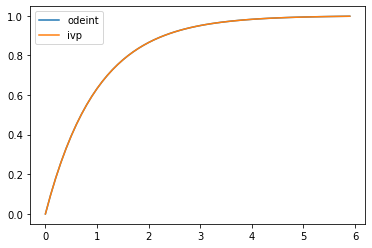

In [17]:
plt.plot(t, y, label='odeint')
plt.plot(t, y_bis, label='ivp')
plt.legend(loc='best')
plt.show()

&nbsp;

### <a id='1.3'></a>  1.3. Example 3

&nbsp;


$5y'(t) = -y(t) + u(t)$

$y(0) = 1$

$u(t) = \begin{cases}
0 & \text{if t } < a \\
k & \text{if t } \geq a
\end{cases}$

In [18]:
# time array
t0 = 0
tf = 40
step = 0.1
t = np.arange(t0, tf, step)

In [19]:
# parameters
a = 10
k = 3

In [20]:
# initial value
y0 = [1]

&nbsp;

#### <a id='1.3.1'></a>  1.3.1. Using odeint

In [21]:
def eq_diff3(y, t):
    u = 0 if t < a else k
    dydt = (-y + u)/5
    return dydt

y = odeint(eq_diff3, y0, t)

In [22]:
y.shape

(400, 1)

&nbsp;

#### <a id='1.3.2'></a>  1.3.2. Using solve_ivp

In [23]:
def eq_diff3_bis(t, y):
    return eq_diff3(y, t)

y_bis = solve_ivp(eq_diff3_bis, [t0, tf], y0, t_eval=t).y

In [24]:
# swap y_bis axis
y_bis = y_bis.T
y_bis.shape

(400, 1)

&nbsp;

#### <a id='1.3.3'></a>  1.3.3. Results

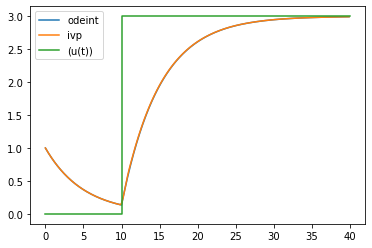

In [25]:
plt.plot(t, y, label='odeint')
plt.plot(t, y_bis, label='ivp')

plt.plot([t0,a,a,tf],[0,0,k,k],label='(u(t))')

plt.legend(loc='best')
plt.show()

&nbsp;

### <a id='1.4'></a>  1.4. Example 4

&nbsp;

$\dot{x}(t) = ke^{-at}$

$x(0) = 0$

In [26]:
# time array
t0 = 0
tf = 10
step = 0.1
t = np.arange(t0, tf, step)

In [27]:
# parameter
k = 1/4
a = 2

In [28]:
# initial value
x0 = [0]

&nbsp;

#### <a id='1.4.1'></a>  1.4.1. Using odeint

In [29]:
def eq_diff4(x, t):
    dxdt = k*np.exp(-a*t)
    return dxdt

x = odeint(eq_diff4, x0, t)

&nbsp;

#### <a id='1.4.2'></a>  1.4.2. Using solve_ivp

In [30]:
def eq_diff4_bis(t, x):
    return eq_diff4(x, t)

x_bis = solve_ivp(eq_diff4_bis, [t0, tf], x0, t_eval=t).y

In [31]:
# swap x_bis axis
x_bis = x_bis.T

&nbsp;

#### <a id='1.4.3'></a>  1.4.3. Results

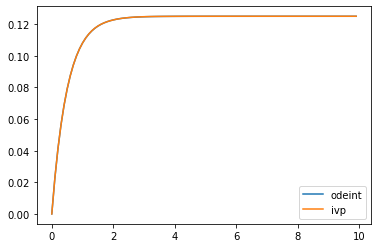

In [32]:
plt.plot(t, x, label='odeint')
plt.plot(t, x_bis, label='ivp')

plt.legend(loc='best')
plt.show()

&nbsp;

### <a id='1.5'></a>  1.5. Example 5

&nbsp;

$\dot{x}(t) = ax(t) + bt^2 + ct + d$

$x(0) = k$

In [33]:
# time array
t0 = 0
tf = 5
step = 0.1
t = np.arange(t0, tf, step)

In [34]:
# parameter
a = -1
b = 1
c = -1
d = 0
k = 2

In [35]:
# initial value
x0 = [k]

&nbsp;

#### <a id='1.5.1'></a>  1.5.1. Using odeint

In [36]:
def eq_diff5(x, t):
    dxdt = a*x + b*t**2 + c*t + c
    return dxdt

x = odeint(eq_diff5, x0, t)

&nbsp;

#### <a id='1.5.2'></a>  1.5.2. Using solve_ivp

In [37]:
def eq_diff5_bis(t, x):
    return eq_diff5(x, t)

x_bis = solve_ivp(eq_diff5_bis, [t0, tf], x0, t_eval=t).y

In [38]:
# swap x_bis axis
x_bis = x_bis.T

&nbsp;

#### <a id='1.5.3'></a>  1.5.3. Results

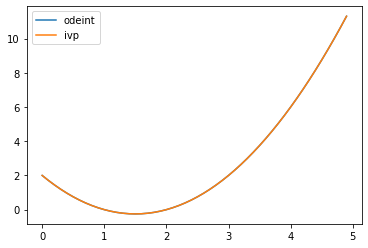

In [39]:
plt.plot(t, x, label='odeint')
plt.plot(t, x_bis, label='ivp')

plt.legend(loc='best')
plt.show()

<hr>

## <a id='2'></a>  2. Templates for systems of 1st order equations

### <a id='2.1'></a>  2.1. Lotka-Volterra

&nbsp;

See wikipedia's article on [Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) for more information.

&nbsp;

$\dot{x_1} =  \color{royalblue}{a} x_1  \color{orangered}{- b x_2}x_1$

$\dot{x_2}  =  \color{royalblue}{c x_1}x_2 \color{orangered}{- d}x_2$


&nbsp;  
**with:**
- $\color{royalblue}{\text{inflow}}$
- $\color{orangered}{\text{outflow}}$

In [40]:
# time array
t0 = 0
tf = 12
step = 0.01
t = np.arange(t0, tf, step)

In [41]:
# parameters
a = 1  # 0.5
b = 1 # 0.06
c = 1 # 0.02
d = 1 # 0.1

In [42]:
# initial values
x1_ini = 1.5
x2_ini = 1
x0 = np.array([x1_ini, x2_ini])

&nbsp;

#### <a id='2.1.1'></a> 2.1.1. Using odeint

In [43]:
def lotka_volterra(x, t):
    x1, x2 = x

    dx1dt = a*x1 - b*x2*x1
    dx2dt = c*x1*x2 - d*x2
    
    return [dx1dt, dx2dt]

x = odeint(lotka_volterra, x0, t)

In [44]:
x.shape

(1200, 2)

In [45]:
Preys = x[:, 0]
Predators = x[:, 1]

&nbsp;

#### <a id='2.1.2'></a> 2.1.2. Using solve_ivp

In [46]:
def lotka_volterra_bis(t, x):
    return lotka_volterra(x, t)

x_bis = solve_ivp(lotka_volterra_bis, [t0, tf], x0, t_eval=t).y

In [47]:
x_bis.shape

(2, 1200)

In [48]:
# we don't bother swaping axis here
Preys_bis = x_bis[0]      # = x[:, 0]
Predators_bis = x_bis[1]  # = x[:, 1]

&nbsp;

#### <a id='2.1.3'></a> 2.1.3. Results

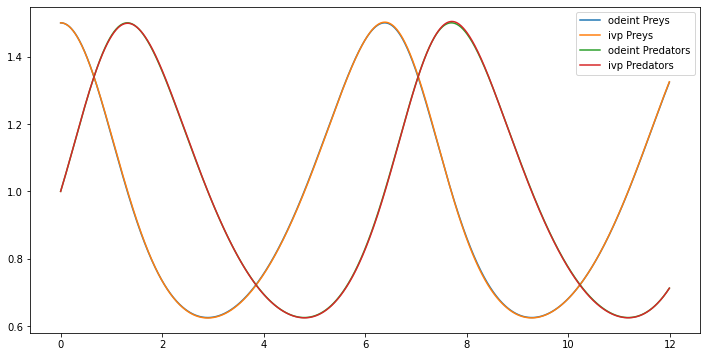

In [49]:
plt.figure(figsize=(12,6))
plt.plot(t, Preys, label="odeint Preys")
plt.plot(t, Preys_bis, label="ivp Preys")

plt.plot(t, Predators, label="odeint Predators")
plt.plot(t, Predators_bis, label="ivp Predators")  # reverse indexes

plt.legend(loc='best')
plt.show()

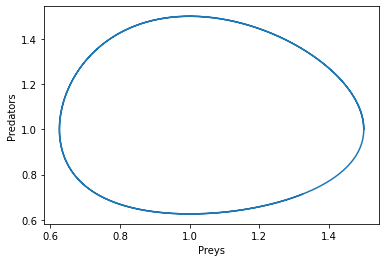

In [50]:
# Phase space
plt.plot(Preys, Predators)
# plt.plot(Preys_bis, Predators_bis)
plt.xlabel("Preys")
plt.ylabel("Predators")
plt.show()

<hr>


### <a id='2.2'></a> 2.2. HIV modelisation

&nbsp;


Exercise from [apmonitor](http://apmonitor.com/pdc/index.php/Main/SimulateHIV)  

$H^{\prime}(t) = \color{royalblue}{kr_1} \color{orangered}{-kr_2}H(t) \color{orangered}{-kr_3V(t)}H(t)$

$I^{\prime}(t) = \color{royalblue}{kr_3H(t)V(t)} \color{orangered}{- kr_4}I(t)$

$V^{\prime}(t) = \color{royalblue}{kr_6I(t)} \color{orangered}{-kr_3H(t)}V(t) \color{orangered}{- kr_5}V(t)$

$\color{royalblue}{\text{inflow}}$  
$\color{orangered}{\text{outflow}}$

&nbsp;

with : 
- **H**: healthy cells
- **I**: infected cells
- **V**: virus

In [51]:
# time array
t0 = 0
tf = 10
step = 0.1
t = np.arange(t0, tf, step)

In [52]:
# parameters
kr1 = 1e5   # new healthy cells per year
kr2 = 0.1   # death rate of healthy cells
kr3 = 2e-7  # healthy cells converting to infected cells
kr4 = 0.5   # death rate of infected cells
kr5 = 5     # death rate of virus
kr6 = 100   # production of virus by infected cells

In [53]:
# initial values
H0 = 1_000_000  # healthy cells
I0 = 0          # infected cells
V0 = 100        # virus
x0 = np.array([H0, I0, V0])

&nbsp;

#### <a id='2.2.1'></a> 2.2.1. Using odeint

In [54]:
def hiv(x, t):
    H, I, V = x

    p = kr3*H*V  # speed calculations
    
    dHdt = kr1 - kr2*H - p
    dIdt = p - kr4*I
    dVdt = -p - kr5*V + kr6*I
    
    return [dHdt, dIdt, dVdt]


x = odeint(hiv, x0, t)

In [55]:
x.shape

(100, 3)

In [56]:
healthy = x[:, 0]
infected = x[:, 1]
virus = x[:, 2]

&nbsp;

#### <a id='2.2.2'></a> 2.2.2. Using solve_ivp

In [57]:
def hiv_bis(t, x):
    return hiv(x, t)

x_bis = solve_ivp(hiv_bis, [t0, tf], x0, t_eval=t).y

In [58]:
x_bis.shape

(3, 100)

In [59]:
healthy_bis = x_bis[0]  # = x[:, 0]
infected_bis = x_bis[1] # = x[:, 1]
virus_bis = x_bis[2]    # = x[:, 2]

&nbsp;

#### <a id='2.2.3'></a> 2.2.3. Results

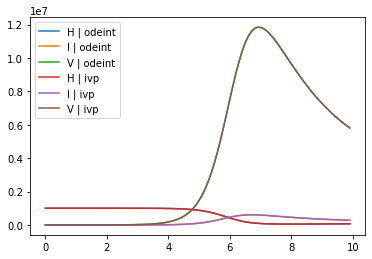

In [60]:
plt.plot(t, healthy, label='H | odeint')
plt.plot(t, infected, label='I | odeint')
plt.plot(t, virus, label='V | odeint')

plt.plot(t, healthy_bis, label='H | ivp')
plt.plot(t, infected_bis, label='I | ivp')
plt.plot(t, virus_bis, label='V | ivp')
         
plt.legend(loc='best')
plt.show()

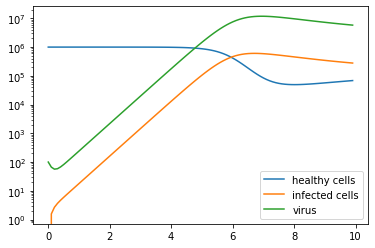

In [61]:
# with a semi-log plot
plt.semilogy(t, healthy, label='healthy cells')
plt.semilogy(t, infected, label='infected cells')
plt.semilogy(t, virus, label='virus')
plt.legend(loc='best')
plt.show()

<hr>

### <a id='2.3'></a> 2.3. Covid 19

&nbsp;



Exercise from [apmonitor](http://apmonitor.com/pdc/index.php/Main/SimulateCOVID19)  

&nbsp;

$S^{\prime}(t) = \color{orangered}{-(1 - u) \beta I(t) } S(t)$

$E^{\prime}(t) = \color{royalblue}{(1 - u)\beta S(t)I(t)}  \color{orangered}{- \alpha} E(t)$

$I^{\prime}(t) = \color{royalblue}{\alpha E(t)} \color{orangered}{- \gamma} I(t)$

$R^{\prime}(t) = \color{royalblue}{\gamma I(t)}$

$\color{royalblue}{\text{inflow}}$  
$\color{orangered}{\text{outflow}}$

&nbsp;

with : 
- **Susceptible**: population fraction that is susceptible to the virus
- **Exposed**: population fraction is infected with the virus but does not transmit to others
- **Infectious**: population fraction that is infected and can infect others
- **Recovered**: population fraction recovered from infection and is immune from further infection 

In [62]:
# time array
t0 = 0
tf = 200
step = 0.1
t = np.arange(t0, tf, step)

In [63]:
# parameters
u = 0.2  # social distancing (0-1)
         # 0   = no social distancing
         # 0.1 = masks
         # 0.2 = masks and hybrid classes
         # 0.3 = masks, hybrid, and online classes

t_incubation = 5.1
t_infective = 3.3
R0 = 2.4
N = 33517 # students

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

In [64]:
# initial values
E0 = 1/N
I0 = 0.00
R0 = 0.00
S0 = 1 - E0 - I0 - R0
x0 = np.array([S0,E0,I0,R0])

&nbsp;

#### <a id='2.3.1'></a> 2.3.1. Using odeint

In [65]:
def covid(x, t):
    s, e, i, r = x
    
    k1 = (1-u)*beta*s*i  # speed up
    k2 = alpha*e         # the calculations
    k3 = gamma*i         # below
    
    dsdt = -k1
    dedt = k1- k2
    didt = k2 - k3
    drdt = k3
    
    return [dsdt, dedt, didt, drdt]

x = odeint(covid, x0, t)

In [66]:
x.shape

(2000, 4)

In [67]:
susceptible = x[:,0]
exposed = x[:,1]
infectious = x[:,2]
recovered = x[:,3]

&nbsp;

#### <a id='2.3.2'></a> 2.3.2. Using solve_ivp

In [68]:
def covid_bis(t, x):
    return covid(x, t)

x_bis = solve_ivp(covid_bis, [t0, tf], x0, t_eval=t).y  

In [69]:
x.shape

(2000, 4)

In [70]:
susceptible_bis = x_bis[0]
exposed_bis = x_bis[1]
infectious_bis = x_bis[2]
recovered_bis = x_bis[3]

&nbsp;

#### <a id='2.3.3'></a> 2.3.3. Results

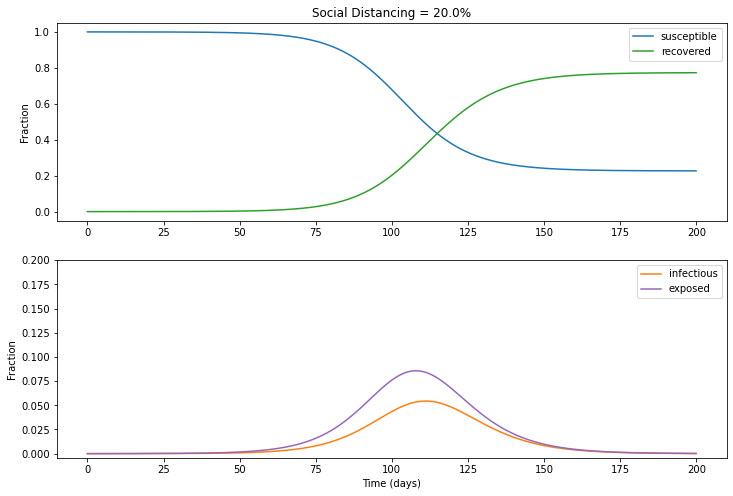

In [71]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.title('Social Distancing = '+str(u*100)+'%')
plt.plot(t, susceptible, color='#1f77b4', label='susceptible')
plt.plot(t, recovered, color='#2ca02c', label='recovered')
plt.ylabel('Fraction')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(t, infectious, color='#ff7f0e', label='infectious')
plt.plot(t, exposed, color='#9467bd', label='exposed')
plt.ylabel('Fraction')
plt.ylim(top=0.2)
plt.legend(loc='best')

plt.xlabel('Time (days)')

plt.show()

<hr>
&nbsp;

### <a id='2.4'></a>  2.4. Lorenz attractor

&nbsp;

See wikipedia's article on [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system)) for more information.

&nbsp;


$\dot{x} =  \color{royalblue}{\sigma y}  \color{orangered}{- \sigma} x$

$\dot{y}  =  \color{royalblue}{x(\rho - z)} \color{orangered}{-}y$

$\dot{z}  =  \color{royalblue}{x y} \color{orangered}{- \beta}z$


&nbsp;  
**with:**
- $\color{royalblue}{\text{inflow}}$
- $\color{orangered}{\text{outflow}}$

In [72]:
# time array
t0 = 0
tf = 100
step = 0.01
t = np.arange(t0, tf, step)

In [73]:
# parameters
sigma = 10
rho = 28
beta = 8/3

In [74]:
# initial values
x0 = 0.1
y0 = 0
z0 = 0
xyz0 = np.array([x0, y0, z0])

&nbsp;

#### <a id='2.4.1'></a> 2.4.1. Using odeint

In [75]:
def lorenz(xyz, t):
    x, y, z = xyz
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y - beta*z
    return(np.array([dxdt, dydt, dzdt]))

xyz = odeint(lorenz, xyz0, t)

In [76]:
xyz.shape

(10000, 3)

In [77]:
x = xyz[:,0]
y = xyz[:,1]
z = xyz[:,2]

&nbsp;

#### <a id='2.4.2'></a> 2.4.2. Using solve_ivp

In [78]:
def lorenz_bis(t, xyz):
    return lorenz(xyz, t)

xyz_bis = solve_ivp(lorenz_bis, [t0, tf], xyz0, t_eval=t).y

In [79]:
xyz_bis.shape

(3, 10000)

In [80]:
x = xyz_bis[0]
y = xyz_bis[1]
z = xyz_bis[2]

&nbsp;

#### <a id='2.4.3'></a> 2.4.3. Results

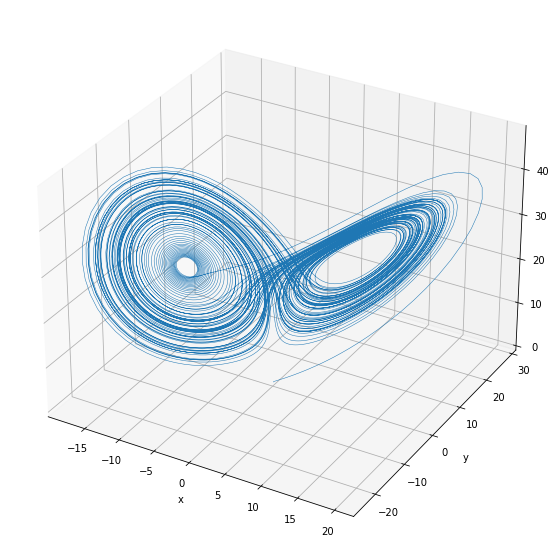

In [81]:
plt.figure(figsize=(10,10))
plt.subplot(111, projection='3d')
plt.plot(x, y, z, lw=0.5)
plt.xlabel('x')
plt.ylabel('y')
# plt.zlabel('z')  # error
plt.show()

<hr>
&nbsp;

## <a id='3'></a>  3. Templates for 2nd order equations

### <a id='3.1'></a>  3.1. Example 1

&nbsp;

$\ddot{y}(t) = k$ 

&nbsp;



$\text{This 2nd order equation is equivalent to the following system of ODEs}$

$$
\begin{cases}
\dot{z_1}(t) = z_2 \\
\dot{z_2}(t) = k
\end{cases}
~~~~~~~~~~~
\text{with}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix} = 
\begin{bmatrix}y \\ \dot{y} \end{bmatrix}
$$

In [82]:
# time array
t0 = 0
tf = 10
step = 0.1
t = np.arange(t0, tf, step)

In [83]:
# parameters
k = 2

In [84]:
# initial values
z1 = 0  # ==> y(0) = 0
z2 = 0  # ==> y'(0) = 0
z_ini = np.array([z1, z2])

&nbsp;

#### <a id='3.1.1'></a>3.1.1. Using odeint

In [85]:
def eq_diff6(z, t):
    z1, z2 = z
    dz1dt = z2
    dz2dt = k
    return [dz1dt, dz2dt]

z = odeint(eq_diff6, z_ini, t)

In [86]:
# check shape of solution
z.shape

(100, 2)

In [87]:
position = z[:, 0]  # = z1
velocity = z[:, 1]  # = z2

&nbsp;

#### <a id='3.1.2'></a> 3.1.2. Using solve_ivp

In [88]:
def eq_diff6_bis(t, z):
    return eq_diff6(z, t)

z_bis = solve_ivp(eq_diff6_bis, [t0, tf], z_ini, t_eval=t).y

In [89]:
# check shape of solution
z_bis.shape

(2, 100)

In [90]:
position_bis = z_bis[0]  # = z1
velocity_bis = z_bis[1]  # = z2

&nbsp;

#### <a id='3.1.3'></a>3.1.2. Results

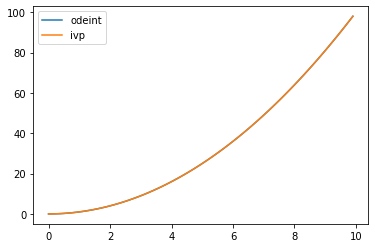

In [91]:
plt.plot(t, position, label='odeint')  # we only want the position
plt.plot(t, position_bis, label='ivp')

plt.legend(loc='best')
plt.show()

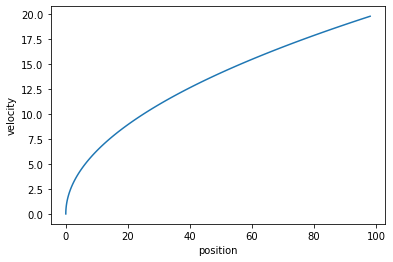

In [92]:
# phase space
plt.plot(position, velocity)
# plt.plot(position_bis, velocity_bis)
plt.xlabel('position')
plt.ylabel('velocity')
plt.show()

&nbsp;

### <a id='3.2'></a>  3.2. Example 2

&nbsp;

$\ddot{y}(t) = a - be^{-kt}$ 

&nbsp;



$\text{This 2nd order equation is equivalent to the following system of ODEs}$

$
\begin{cases}
\dot{z_1}(t) = z_2 \\
\dot{z_2}(t) = a - be^{-kt}
\end{cases}
~~~~~~~~~~~
\text{with}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix} = 
\begin{bmatrix}y \\ \dot{y} \end{bmatrix}
$

In [93]:
from numpy import exp

In [94]:
# time array
t0 = 0
tf = 20
step = 0.1
t = np.arange(t0, tf, step)

In [95]:
# parameters
a = 1
b = 0.5
k = 0.002

In [96]:
# initial values
z1 = 4  # ==> y(0) = 0
z2 = 0  # ==> y'(0) = 0
z_ini = np.array([z1, z2])

&nbsp;

#### <a id='3.2.1'></a>3.2.1. Using odeint

In [97]:
def eq_diff7(z, t):
    z1, z2 = z
    dz1dt = z2
    dz2dt = a-b*exp(-k*t)
    return [dz1dt, dz2dt]

z = odeint(eq_diff7, z_ini, t)

In [98]:
# check shape of solution
z.shape

(200, 2)

In [99]:
position = z[:, 0]  # = z1
velocity = z[:, 1]  # = z2

&nbsp;

#### <a id='3.2.2'></a>3.2.2. Using solve_ivp

In [100]:
def eq_diff7_bis(t, z):
    return eq_diff7(z, t)

z_bis = solve_ivp(eq_diff7_bis, [t0, tf], z_ini, t_eval=t).y

In [101]:
# check shape of solution
z_bis.shape

(2, 200)

In [102]:
position_bis = z_bis[0]  # = z1
velocity_bis = z_bis[1]  # = z2

&nbsp;

#### <a id='3.2.3'></a>3.2.3. Results

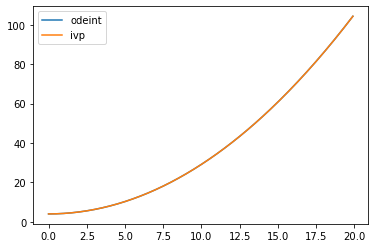

In [103]:
plt.plot(t, position, label='odeint')  # we only want the position
plt.plot(t, position_bis, label='ivp')

plt.legend(loc='best')
plt.show()

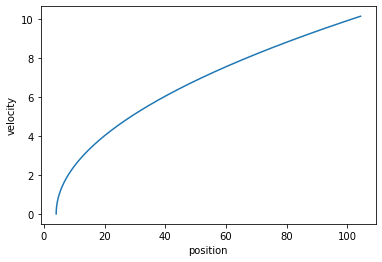

In [104]:
# phase space
plt.plot(position, velocity)
# plt.plot(position_bis, velocity_bis)
plt.xlabel('position')
plt.ylabel('velocity')
plt.show()

&nbsp;

### <a id='3.3'></a>  3.3. Example 3

&nbsp;

$\ddot{y}(t) + a\dot{y}(t) + by(t) = \cos(ct)$ 

&nbsp;



$\text{This 2nd order equation is equivalent to the following system of ODEs}$

$
\begin{cases}
\dot{z_1}(t) = z_2 \\
\dot{z_2}(t) = - az_2(t) - bz_1(t) + \cos(ct)
\end{cases}
~~~~~~~~~~~
\text{with}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix} = 
\begin{bmatrix}y \\ \dot{y} \end{bmatrix}
$

In [2]:
from numpy import cos

In [3]:
# time array
t0 = 0
tf = 20
step = 0.1
t = np.arange(t0, tf, step)

In [4]:
# parameters
a = 2
b = 2
c = 1

In [5]:
# initial values
z1 = 0  # ==> y(0) = 0
z2 = 0  # ==> y'(0) = 0
z_ini = np.array([z1, z2])

&nbsp;

#### <a id='3.3.1'></a>3.3.1. Using odeint

In [6]:
def eq_diff8(z, t):
    z1, z2 = z
    dz1dt = z2
    dz2dt = -a*z2-b*z1+cos(c*t)
    return [dz1dt, dz2dt]

z = odeint(eq_diff8, z_ini, t)

In [7]:
# check shape of solution
z.shape

(200, 2)

In [8]:
position = z[:, 0]  # = z1
velocity = z[:, 1]  # = z2

&nbsp;

#### <a id='3.3.2'></a>3.3.2. Using solve_ivp

In [9]:
def eq_diff8_bis(t, z):
    return eq_diff8(z, t)

z_bis = solve_ivp(eq_diff8_bis, [t0, tf], z_ini, t_eval=t).y

In [10]:
# check shape of solution
z_bis.shape

(2, 200)

In [11]:
position_bis = z_bis[0]  # = z1
velocity_bis = z_bis[1]  # = z2

&nbsp;

#### <a id='3.3.3'></a>3.3.3. Results

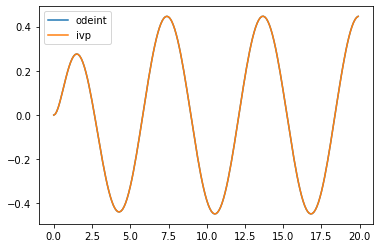

In [12]:
plt.plot(t, position, label='odeint')  # we only want the position
plt.plot(t, position_bis, label='ivp')

plt.legend(loc='best')
plt.show()

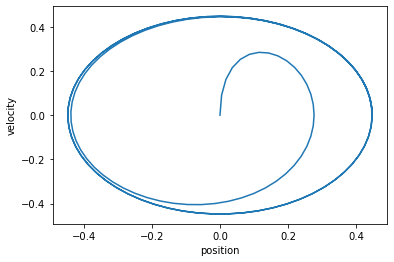

In [13]:
# phase space
plt.plot(position, velocity)
# plt.plot(position_bis, velocity_bis)
plt.xlabel('position')
plt.ylabel('velocity')
plt.show()

&nbsp;

### <a id='3.4'></a>  3.4. Example 4

&nbsp;

$\ddot{y}(t) = a\dot{y}(t) + by(t) + c$ 

&nbsp;



$\text{This 2nd order equation is equivalent to the following system of ODEs}$

$
\begin{cases}
\dot{y_1}(t) = y_2 \\
\dot{y_2}(t) = ay_2(t) + by_1(t) + c
\end{cases}
~~~~~~~~~~~
\text{with}
\begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = 
\begin{bmatrix}y \\ \dot{y} \end{bmatrix}
$

In [117]:
# time array
t0 = 0
tf = 10
step = 0.05
t = np.arange(t0, tf, step)

In [118]:
# parameters
a = -1
b = -4
c = 1

In [119]:
# initial values
y1_ini = 0
y2_ini = 0.1
y0 = np.array([y1_ini, y2_ini])

&nbsp;

#### <a id='3.4.1'></a>3.4.1. Using odeint

In [120]:
def eq_diff9(y, t):
    y1, y2 = y
    dy1dt = y2
    dy2dt = a*y2 + b*y1 + c
    
    return [dy1dt, dy2dt]

y = odeint(eq_diff9, y0, t)

In [121]:
position = y[:, 0]  # = y1
velocity = y[:, 1]  # = y2

&nbsp;

#### <a id='3.4.2'></a>3.4.2. Using solve_ivp

In [122]:
def eq_diff9_bis(t, y):
    return eq_diff9(y, t)

y_bis = solve_ivp(eq_diff9_bis, [t0, tf], y0, t_eval=t).y

In [123]:
position_bis = y_bis[0]  # = y1
velocity_bis = y_bis[1]  # = y2

&nbsp;

#### <a id='3.4.3'></a>3.4.3. Results

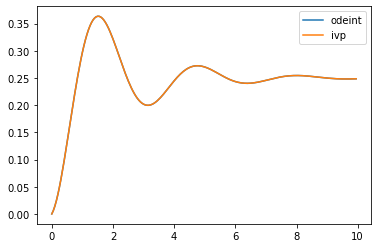

In [124]:
plt.plot(t, position, label='odeint')
plt.plot(t, position_bis, label='ivp')
plt.legend(loc='best')
plt.show()

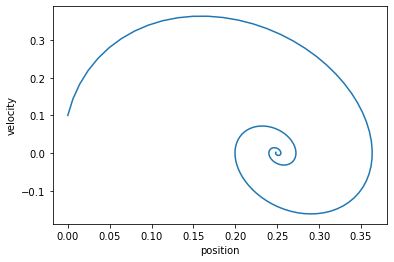

In [125]:
# phase space
plt.plot(position, velocity)
# plt.plot(position_bis, velocity_bis)
plt.xlabel('position')
plt.ylabel('velocity')
plt.show()

&nbsp;

### <a id='3.5'></a>  3.5. Example 5

&nbsp;

$\ddot{x}(t) = \mu(1 - x^2) \dot{x}(t) - x(t)$ 

&nbsp;



$\text{This 2nd order equation is equivalent to the following system of ODEs}$

$
\begin{cases}
\dot{x} = v \\
\dot{v} = \mu(1 - x^2) v - x
\end{cases}
~~~~~~~~~~~
\text{with}
\begin{bmatrix} x \\ v \end{bmatrix} = 
\begin{bmatrix}x \\ \dot{x} \end{bmatrix}
$

In [126]:
# time array
t0 = 0
tf = 50
step = 0.1
t = np.arange(t0, tf, step)

In [127]:
# parameters
mu = -0.2

In [128]:
# initial values
x_ini = 1
v_ini = 0
x0 = np.array([x_ini, v_ini])

&nbsp;

#### <a id='3.5.1'></a>3.5.1. Using odeint

In [129]:
def eq_diff10(x, t):
    x, v = x
    dxdt = v
    dvdt = mu*(1-x**2)*v - x
    return [dxdt, dvdt]

x = odeint(eq_diff10, x0, t)

In [130]:
position = x[:, 0]  # = x
velocity = x[:, 1]  # = v

&nbsp;

#### <a id='3.5.2'></a>3.5.2. Using solve_ivp

In [131]:
def eq_diff10_bis(t, x):
    return eq_diff10(x, t)

x_bis = solve_ivp(eq_diff10_bis, [t0, tf], x0, t_eval=t).y

In [132]:
position_bis = x_bis[0]  # = x
velocity_bis = x_bis[1]  # = v

&nbsp;

#### <a id='3.5.3'></a>3.5.3. Results

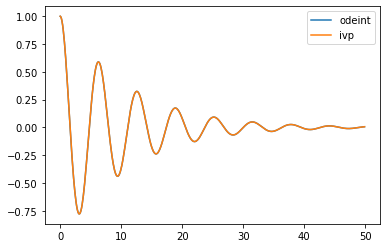

In [133]:
plt.plot(t, position, label='odeint')
plt.plot(t, position_bis, label='ivp')
plt.legend(loc='best')
plt.show()

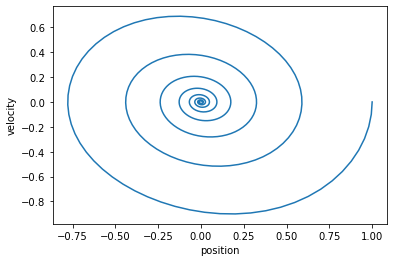

In [134]:
# phase space
plt.plot(position, velocity)
# plt.plot(position_bis, velocity_bis)
plt.xlabel('position')
plt.ylabel('velocity')
plt.show()

<hr>
&nbsp;


## <a id='4'></a>4. Advanced manipulation

&nbsp;

$y'(t) = -ky(t)$

In [135]:
# time array
t0 = 0
tf = 10
step = 0.1
t = np.arange(t0, tf, step)

we can also use `linspace()` for defining the time array:                   
`t = np.linspace(t0, tf, nb_points)`

with for example:
`nb_points = int((tf-t0)/step)`

In [136]:
# parameter
k = 1/2

In [137]:
# initial value
y0 = [5]

&nbsp;

### <a id='4.1'></a> 4.1.Odeint

#### <a id='4.1.1'></a> 4.1.1. Input

In [138]:
# Let's reuse our 1st example
def eq_diff1(y, t):
    dydt = -k * y
    return dydt

In [139]:
# odeint accepts number type
y0 = 5
y = odeint(eq_diff1, y0, t)

In [140]:
# and also arrays
y0 = [5]
y = odeint(eq_diff1, y0, t)

&nbsp;

#### <a id='4.1.2'></a> 4.1.2. Output

In [141]:
# type of solution
type(y)

numpy.ndarray

In [142]:
# shape of solution
y.shape

(100, 1)

&nbsp;

#### <a id='4.1.3'></a> 4.1.3. Arguments

We can also `k` as an argument when calling `odeint()`. But we then need to rewrite `eq_diff1()`

In [143]:
# rewriting eq_diff1 as follow
def eq_diff1_(y, t, k_):
    dydt = -k_ * y
    return dydt

In [144]:
# allow us to pass k in as an argument in odeint()
y = odeint(eq_diff1_, y0, t, args=(k, ))  # args = ( ,)

**NOTE:**
- the `args` argument in `odeint()` needs to a tuple 
- the length of this tuple `=` the numbe of extra argument in the new `eq_diff1_` (not counting y and t)
- the tuple needs to finish by `,`

&nbsp;

### <a id='4.2'></a> 4.2. Solve_ivp

#### <a id='4.2.1'></a> 4.2.1. Input

When using `solve_ivp` instead of `odeint`:
- we need to reverse the order of arguments
- initial value must be an array

In [145]:
# reverse order of arguments
def eq_diff1_bis(t, y): 
    return eq_diff1(y, t)

In [146]:
# default use of solve_ivp
y_bis = solve_ivp(eq_diff1_bis, [t0, tf], y0)

In [147]:
# solve_ivp won't accept number type as initial values
# It only accept arrays as initial values

# y0 = 5  # uncomment to see what happens
y0 = [5]
y_bis = solve_ivp(eq_diff1_bis, [t0, tf], y0)

&nbsp;

#### <a id='4.2.2'></a> 4.2.2. Output and time resolution

`solve_ivp()` returns a `OdeResult` (not a numpy array)

In [148]:
# solve_ivp returns a OdeResult
type(y_bis)

scipy.integrate._ivp.ivp.OdeResult

In [149]:
# and it also has a smaller time resolution
t_bis = y_bis.t
t_bis.shape

(8,)

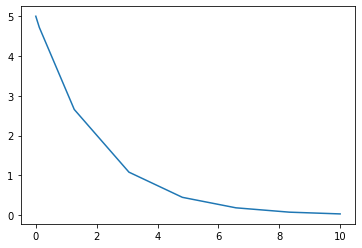

In [150]:
# which we can see here
plt.plot(y_bis.t, y_bis.y[0])
plt.show()

**NOTE:** the time resolution is automatically set with solve_ivp (unless we define it as a parameter)

In [151]:
# This is the number of time points we have
len(y_bis.t)

8

In [152]:
# vs. with odeint
len(t)

100

In [153]:
# to have the same time resolution, we can add the parameter t_eval
y_bis = solve_ivp(eq_diff1_bis, [t0, tf], y0, t_eval=t)

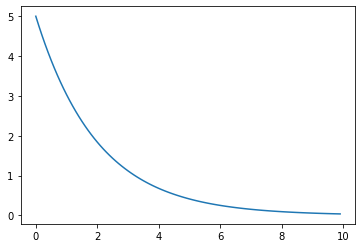

In [154]:
plt.plot(y_bis.t, y_bis.y[0])
plt.show()

In [155]:
# and to get an array as a solution we do
y_bis = y_bis.y

In [156]:
# or alternatively
y_bis = solve_ivp(eq_diff1_bis, [t0, tf], y0, t_eval=t).y

In [157]:
# check
type(y_bis)

numpy.ndarray

In [158]:
# check the shape of solution
y_bis.shape

(1, 100)

The dimensions of the solution using `solve_ivp()` are the reversed than with `odeint()`

When ploting the solution we will need to do either:
- `y_bis[0]`
- `y_bis = y_bis.T` and then use `y_bis`

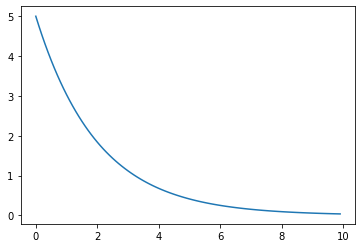

In [159]:
plt.plot(t, y_bis[0])  # plot with 't' (same as for odeint)

# plt.plot(t, y_bis.T)  # alternatively

plt.show()

&nbsp;

#### <a id='4.2.3'></a> 4.2.3. Arguments

Same as with `odeint()`, we can pass `k` as an argument when calling `solve_ivp()`.

In [160]:
# rewriting eq_diff1_bis as follow
def eq_diff1_bis_(t, y, k_):
    dydt = -k_ * y
    return dydt

In [161]:
# allow us to pass k as an argument in solve_ivp
y_bis = solve_ivp(eq_diff1_bis_, [t0, tf], y0, t_eval=t, args=(k,)).y

&nbsp;


### <a id='4.3'></a> 4.3. Multiple parameter values


#### <a id='4.3.1'></a> 4.3.1. 1st order equation


&nbsp;

$y'(t) = -ky(t)$

In [13]:
# time array
t0 = 0
tf = 8
step = 0.1
t = np.arange(t0, tf, step)

In [14]:
# multiple k parameters
k = np.array([0.1, 0.2, 0.4, 0.8, 2])

In [15]:
# initial value
y0 = [5]

In [16]:
# reusing the eq_diff_ that we saw earlier
def eq_diff1_(y, t, k_):
    dydt = -k_ * y
    return dydt


def eq_diff1_bis_(t, y, k_):
    return eq_diff1_(y, t, k_)

We then create a matrix that will store the k solutions

`y = np.zeros(shape=(nb_options, time, nb_equations))
for i, val in enumerate(nb_options):
    y[i] = odeint(eq_diff1, y0, t)`
        
        
with:
- `nb_options = len(k)`
- `nb_equations = len(y0) = 1`
- `time` and `nb_equations` are in reverse order in solve_ivp vs. odeint

In [17]:
# Using odeint
y = np.zeros(shape=(len(k), len(t), len(y0)))  

for i, val in enumerate(k):
    y[i] = odeint(eq_diff1_, y0, t, args=(val,))

In [18]:
y.shape

(5, 80, 1)

In [19]:
# Using solve_ivp
y_bis = np.zeros(shape=(len(k), len(y0), len(t)))  # len(k) <--> len(y0) !!

for i, val in enumerate(k):
    y_bis[i] = solve_ivp(eq_diff1_bis_, [t0, tf], y0, t_eval=t, args=(val,)).y

In [23]:
# mind the difference in shape compared to y
print(y_bis.shape)
print(y_bis.T.shape)

(5, 1, 80)
(80, 1, 5)


In [170]:
# swap y_bis axis
y_bis = np.swapaxes(y_bis, 1, 2)
y_bis.shape

(5, 80, 1)

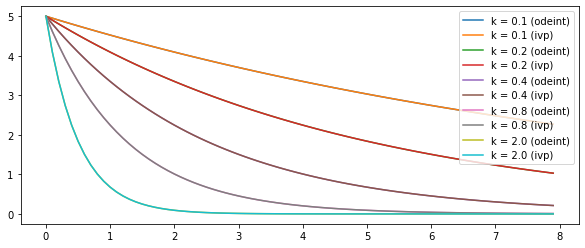

In [171]:
plt.figure(figsize=(10,4))

for i, val in enumerate(k):
    plt.plot(t, y[i], label='k = ' + str(val) + ' (odeint)')
    plt.plot(t, y_bis[i], label='k = ' + str(val) + ' (ivp)')

plt.legend(loc='best')
plt.show()

&nbsp;

#### <a id='4.3.2'></a> 4.3.2. System of 1st order equations: [Covid](#2.3) equations

In [172]:
# time array
t0 = 0
tf = 200
step = 0.1
t = np.arange(t0, tf, step)

In [173]:
# parameters
u = [0, 0.1, 0.2, 0.3]  # social distancing (0-1)
                        # 0   = no social distancing
                        # 0.1 = masks
                        # 0.2 = masks and hybrid classes
                        # 0.3 = masks, hybrid, and online classes
t_incubation = 5.1
t_infective = 3.3
R0 = 2.4
N = 33517 # students
alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

In [174]:
# initial values
E0 = 1/N
I0 = 0.00
R0 = 0.00
S0 = 1 - E0 - I0 - R0
x0 = [S0,E0,I0,R0]

In [175]:
def covid(x, t, u_):
    s, e, i, r = x
    k1 = (1-u_)*beta*s*i   # speed up
    k2 = alpha*e           # the calculations
    k3 = gamma*i           # below
    dsdt = -k1
    dedt = k1- k2
    didt = k2 - k3
    drdt = k3
    return [dsdt, dedt, didt, drdt]

def covid_bis(t, x, u_):
    return covid(x, t, u_)

In [176]:
# Using odeint
x = np.zeros(shape=(len(u), len(t), len(x0)))

for i, val in enumerate(u):
    x[i] = odeint(covid, x0, t, args=(val,))

In [177]:
x.shape

(4, 2000, 4)

In [178]:
# Using solve_ivp
x_bis = np.zeros(shape=(len(u), len(x0), len(t)))

for i, val in enumerate(u):
    x_bis[i] = solve_ivp(covid_bis, [t0, tf], x0, t_eval=t, args=(val,)).y   # add .y

In [179]:
x_bis.shape

(4, 4, 2000)

In [180]:
# swap x_bis axis
x_bis = np.swapaxes(x_bis, 1, 2)
x_bis.shape

(4, 2000, 4)

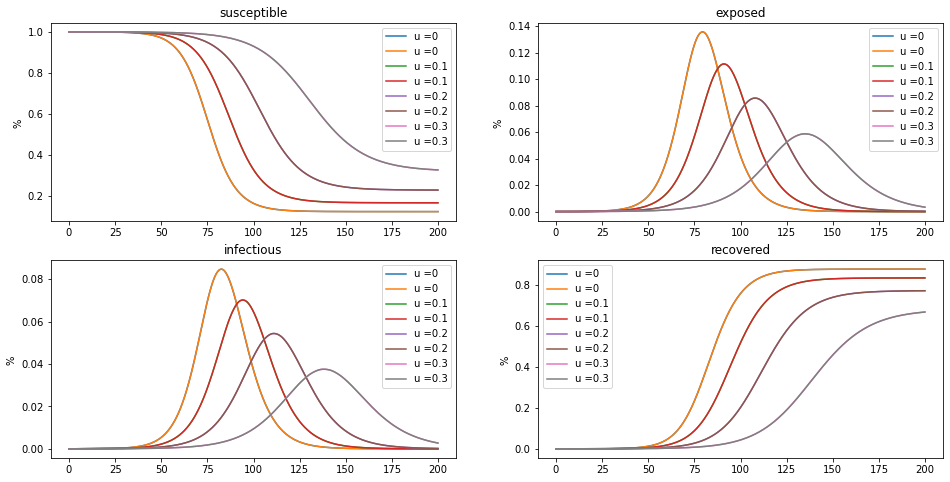

In [181]:
# Plot the results

label = ['susceptible', 'exposed', 'infectious', 'recovered']

plt.figure(figsize=(16,8))

for j in range(4):
    plt.subplot(2, 2, j+1)
    plt.title(label[j])
    for i, val in enumerate(u):   
        plt.plot(t, x[i,:, j], label='u =' + str(val))
        plt.plot(t, x_bis[i,:, j], label='u =' + str(val))  # alternatively
    plt.ylabel('% ')
    plt.legend(loc='best')
plt.show()

&nbsp;

### <a id='4.4'></a> 4.4 Multiple initial values


#### <a id='4.4.1'></a> 4.4.1. 1st order equation


&nbsp;

$y'(t) = -ky(t)$

In [182]:
# time array
t0 = 0
tf = 8
step = 0.1
t = np.arange(t0, tf, step)

In [183]:
# parameters
k = 1/2

In [184]:
# initial value
y0 = [5, 10, 20]

**NOTE :** the array must be of dimension 1

In [185]:
# reusing the eq_diff_ that we saw earlier
def eq_diff1_(y, t, k_):
    dydt = -k_ * y
    return dydt


def eq_diff1_bis_(t, y, k_):
    return eq_diff1_(y, t, k_)

**NOTE:** We could reuse the previous formula:

`y = np.zeros(shape=(nb_options, time, nb_equations)) 
for i, val in enumerate(nb_options):
    y[i] = odeint(eq_diff1, y0, t)`
    
  
But since `nb_options = len(k) = 1`, we can actually skip this step and do directly

In [186]:
# len(k) = 1, so we can do this instead
y = odeint(eq_diff1, y0, t)

In [187]:
y.shape

(80, 3)

Each component correspond to one of the initial value

In [188]:
# similarly for solve_ivp
y_bis = solve_ivp(eq_diff1_bis, [t0, tf], y0, t_eval=t).y

In [189]:
y_bis.shape

(3, 80)

In [190]:
# swap y_bis axis
y_bis = y_bis.T
y_bis.shape

(80, 3)

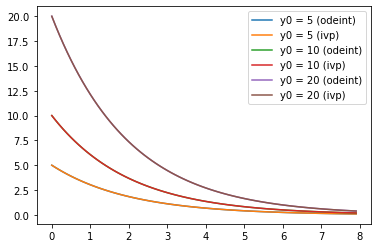

In [191]:
for i, y0_ini in enumerate(y0):
    plt.plot(t, y[:, i], label='y0 = ' + str(y0_ini) + ' (odeint)')
    plt.plot(t, y_bis[:, i], label='y0 = ' + str(int(y0_ini)) + ' (ivp)')
    
plt.legend(loc='best')
plt.show()

&nbsp;

#### <a id='4.4.2'></a> 4.4.2. System of 1st order equations: [Lotka-Volterra](#2.1) equations

In [192]:
# time array
t0 = 0
tf = 100
step = 0.1
t = np.arange(t0, tf, step)

In [193]:
# parameters
a = 0.5
b = 0.06
c = 0.02
d = 0.1

In [194]:
# initial values
x1_ini = [8, 12, 16, 20, 24]  # Preys
x2_ini = [3, 4, 5, 10, 15]       # Predators

We actually want all the combinasions possible of those initial values (i.e. the *cartesian product*)

In [195]:
def cartesian(a, b):
    return np.transpose([np.tile(a, len(b)), np.repeat(b, len(a))])

In [196]:
# all combinasions of initial values
x0 = cartesian(x1_ini, x2_ini)
x0

array([[ 8,  3],
       [12,  3],
       [16,  3],
       [20,  3],
       [24,  3],
       [ 8,  4],
       [12,  4],
       [16,  4],
       [20,  4],
       [24,  4],
       [ 8,  5],
       [12,  5],
       [16,  5],
       [20,  5],
       [24,  5],
       [ 8, 10],
       [12, 10],
       [16, 10],
       [20, 10],
       [24, 10],
       [ 8, 15],
       [12, 15],
       [16, 15],
       [20, 15],
       [24, 15]])

In [197]:
# Reusing the equations seen earlier

def lotka_volterra(x, t):
    x1, x2 = x
    dx1dt = a*x1 - b*x2*x1
    dx2dt = c*x1*x2 - d*x2
    return [dx1dt, dx2dt]


def lotka_volterra_bis(t, x):
    return lotka_volterra(x, t)

In [198]:
# The array is not of dimension 1
x0.shape

(25, 2)

**NOTE:** `x0` is **NOT** of dimension 1. So we can't use this:

        x = odeint(lotka_volterra, x0, t)

In [199]:
# The following will throw an error
# x = odeint(lotka_volterra, x0, t)  # uncomment to see the error message

Instead we need to reuse this formula:

`x = np.zeros(shape=(nb_options, time, nb_equations))
for i, val in enumerate(nb_options):
    x[i] = odeint(eq_diff1, x0, t)`
        
        
with:
- `nb_options = len(x0)`
- `nb_equations = len(x0[0])`

In [200]:
x = np.zeros(shape=(len(x0), len(t), len(x0[0])))

for i, val_ini in enumerate(x0):
    x[i] = odeint(lotka_volterra, val_ini, t)

In [201]:
x.shape

(25, 1000, 2)

In [202]:
Preys = x[:, :, 0]
Predators =  x[:, :, 1]

In [203]:
x_bis = np.zeros(shape=(len(x0), len(x0[0]), len(t)))

for i, val_ini in enumerate(x0):
    x_bis[i] = solve_ivp(lotka_volterra_bis, [t0, tf], val_ini, t_eval=t).y

In [204]:
x_bis.shape

(25, 2, 1000)

In [205]:
Preys_bis = x_bis[:, 0]
Predators_bis =  x_bis[:, 1]

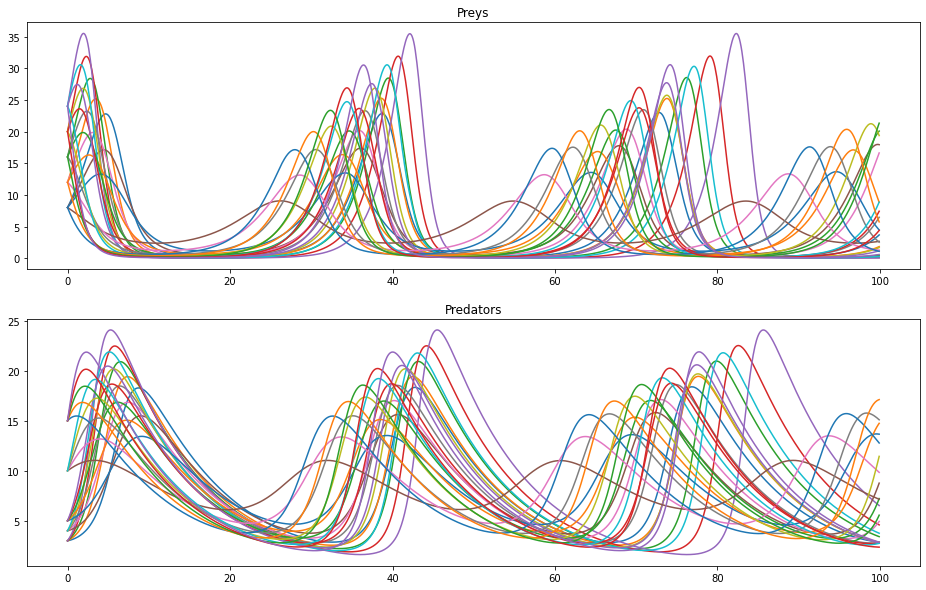

In [206]:
labels = ['Preys', 'Predators']

plt.figure(figsize=(16,10))
for j, title in enumerate(labels):
    plt.subplot(2, 1, j+1)
    plt.title(title)
    for i, tup in enumerate(x0):
#         plt.plot(t, x[i, :, j], label='Preys =' + str(tup[0]) + ' | Pred = ' + str(tup[1]))
        plt.plot(t, x_bis[i, j], label='Preys =' + str(tup[0]) + ' | Pred = ' + str(tup[1]))
#     plt.legend(loc='best')
plt.show()

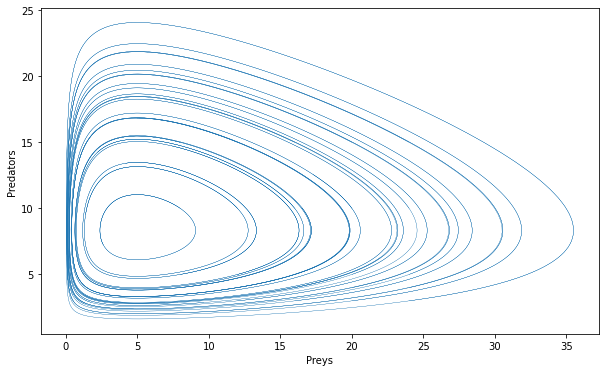

In [207]:
# phase space
plt.figure(figsize=(10,6))
for i in range(len(x0)):
    plt.plot(Preys[i], Predators[i], color='#1f77b4', lw=0.2)
plt.xlabel("Preys")
plt.ylabel("Predators")
plt.show()

&nbsp;

### <a id='4.5'></a> 4.5. Multiple initial values and parameter values


#### <a id='4.5.1'></a> 4.4.1. 1st order equation


&nbsp;

$y'(t) = -ky(t)$

In [208]:
# time array
t0 = 0
tf = 8
step = 0.1
t = np.arange(t0, tf, step)

In [209]:
# parameters
k = [0.1, 0.5, 1.5]

In [210]:
# initial value
y0 = [5, 10]

In [211]:
# reusing the eq_diff_ that we saw earlier
def eq_diff1_(y, t, k_):
    dydt = -k_ * y
    return dydt


def eq_diff1_bis_(t, y, k_):
    return eq_diff1_(y, t, k_)

In [212]:
# Using odeint
y = np.zeros(shape=(len(k), len(t), len(y0)))  

for i, val in enumerate(k):
    y[i] = odeint(eq_diff1_, y0, t, args=(val,))

In [213]:
# check the shape of solution
y.shape

(3, 80, 2)

In [214]:
# Using solve_ivp
y_bis = np.zeros(shape=(len(k), len(y0), len(t)))  # reverse order 

for i, val in enumerate(k):
    y_bis[i] = solve_ivp(eq_diff1_bis_, [t0, tf], y0, t_eval=t, args=(val,)).y

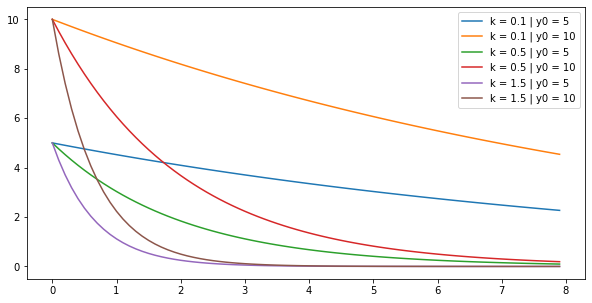

In [215]:
plt.figure(figsize=(10,5))

for i, val in enumerate(k):
    for j, y0_ini in enumerate(y0):
        plt.plot(t, y[i, :, j], label='k = ' + str(val) + ' | y0 = ' + str(y0_ini))
#         plt.plot(t, y_bis[i, j, :], label='k = ' + str(val) + ' | y0 = ' + str(y0_ini))

plt.legend(loc='best')
plt.show()